In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
path = 'dataset/'


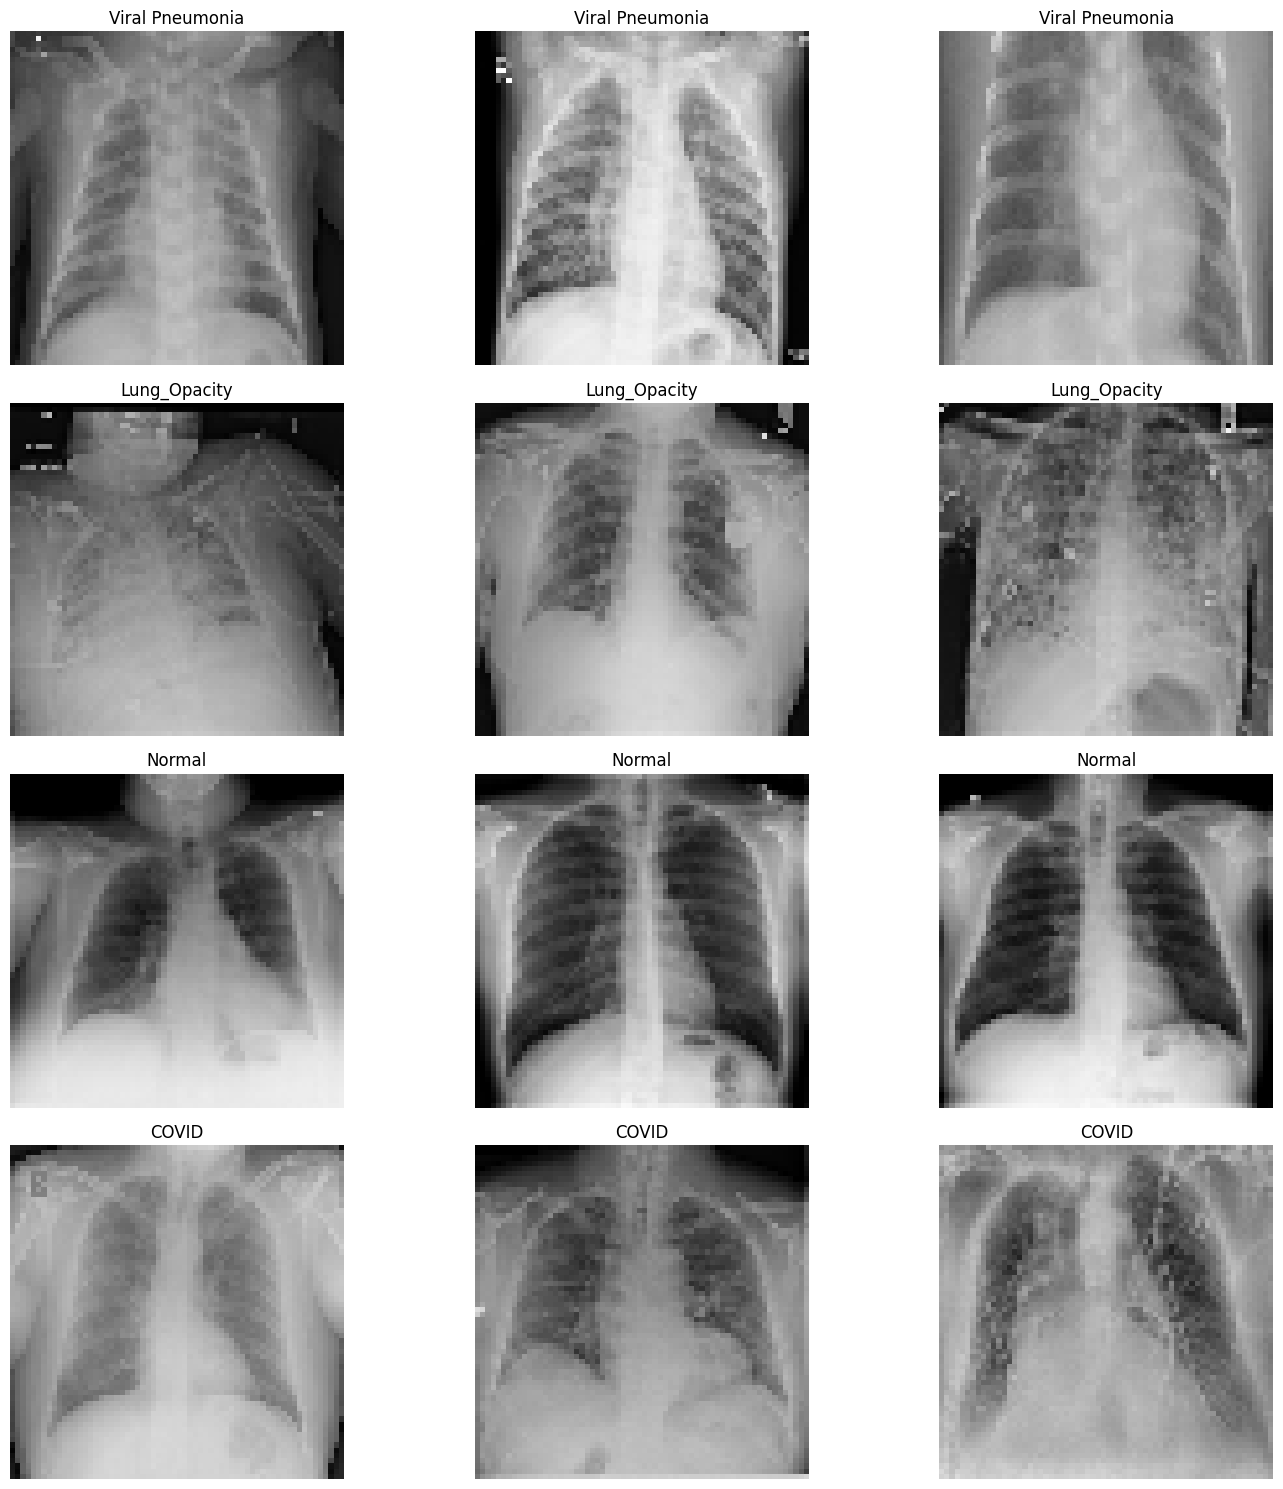

In [3]:
import matplotlib.pyplot as plt
import os
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def visualize_random_images(data_dir, num_images=3):
    classes = os.listdir(data_dir)  # List all classes
    plt.figure(figsize=(15, 15))
    
    for class_idx, class_name in enumerate(classes):
        class_path = os.path.join(data_dir, class_name)
        images = os.listdir(class_path)
        random_images = random.sample(images, num_images)
        
        for i, img_name in enumerate(random_images):
            img_path = os.path.join(class_path, img_name)
            img = load_img(img_path, target_size=(64, 64))
            plt.subplot(len(classes), num_images, class_idx * num_images + i + 1)
            plt.imshow(img)
            plt.title(class_name)
            plt.axis('off')

    plt.tight_layout()
    plt.show()

visualize_random_images('dataset/')


### **Simple Machine Learning Model (Without Optimization)**

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import os

datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
)

train_generator = datagen.flow_from_directory(
    'dataset',
    target_size=(100, 100),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    'dataset',
    target_size=(100, 100),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical',
    subset='validation'
)


Found 16933 images belonging to 4 classes.
Found 4232 images belonging to 4 classes.


In [12]:
# Build a simple CNN model
model = Sequential(
    [
        Conv2D(32, (3, 3), activation="relu", input_shape=(100, 100, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation="relu"),
        Dense(4, activation="softmax"),  # Use softmax for multi-class classification
    ]
)

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Create the saved_models directory if it doesn't exist
os.makedirs("saved_models", exist_ok=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=30,  # Can adjust the number of epochs as needed
)

# Save the model in the saved_models folder
model.save("saved_models/simple_model.keras")

# Print the final training and validation accuracy in percentage
final_train_accuracy = history.history["accuracy"][-1] * 100
final_val_accuracy = history.history["val_accuracy"][-1] * 100
print(f"Final Training Accuracy: {final_train_accuracy:.2f}%")
print(f"Final Validation Accuracy: {final_val_accuracy:.2f}%")

# Plotting the training and validation accuracy and loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Epoch 1/30


2024-10-13 17:07:30.562931: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


 75/529 [===>..........................] - ETA: 1:59 - loss: 1.1543 - accuracy: 0.4896

KeyboardInterrupt: 

Found 16504 images belonging to 15 classes.
Found 2070 images belonging to 15 classes.
Found 2064 images belonging to 15 classes.


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 15)             │         3,855 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,278,927 (4.88 MB)

 Trainable params: 1,277,967 (4.88 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/50
515/515 ━━━━━━━━━━━━━━━━━━━━ 124s 226ms/step - accuracy: 0.4102 - loss: 2.8076 - val_accuracy: 0.3853 - val_loss: 2.8708 - learning_rate: 0.0010
Epoch 2/50
515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.5938 - loss: 2.0725 - val_accuracy: 0.1364 - val_loss: 3.5348 - learning_rate: 0.0010
Epoch 3/50
515/515 ━━━━━━━━━━━━━━━━━━━━ 120s 231ms/step - accuracy: 0.6424 - loss: 1.7901 - val_accuracy: 0.4668 - val_loss: 2.5843 - learning_rate: 0.0010
Epoch 4/50
515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.6875 - loss: 1.5769 - val_accuracy: 0.6364 - val_loss: 2.2513 - learning_rate: 0.0010
Epoch 5/50
515/515 ━━━━━━━━━━━━━━━━━━━━ 122s 236ms/step - accuracy: 0.7124 - loss: 1.4826 - val_accuracy: 0.6450 - val_loss: 1.7272 - learning_rate: 0.0010
Epoch 6/50
515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.8125 - loss: 1.0841 - val_accuracy: 0.5909 - val_loss: 1.7476 - learning_rate: 0.0010
Epoch 7/50
515/515 ━━━━━━━━━━━━━━━━━━━━ 119s 229ms/step - accuracy: 0.

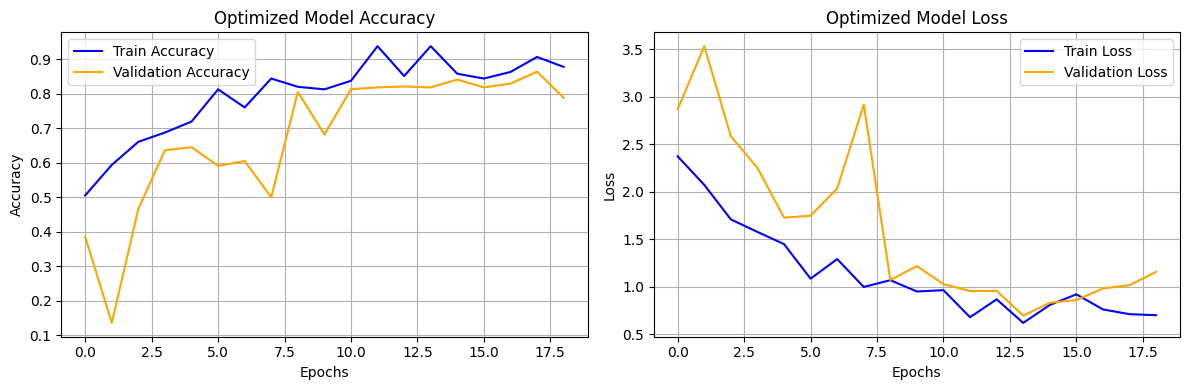

In [66]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os
import matplotlib.pyplot as plt


optimized_model = Sequential()

optimized_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1), kernel_regularizer=l2(0.001)))
optimized_model.add(BatchNormalization())
optimized_model.add(MaxPooling2D(pool_size=(2, 2)))

optimized_model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
optimized_model.add(BatchNormalization())
optimized_model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer with increased complexity
optimized_model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
optimized_model.add(BatchNormalization())
optimized_model.add(MaxPooling2D(pool_size=(2, 2)))

# Add Dropout to prevent overfitting
optimized_model.add(Dropout(0.5))

# Flatten layer
optimized_model.add(Flatten())

# Fully connected layers with regularization and dropout
optimized_model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
optimized_model.add(BatchNormalization())
optimized_model.add(Dropout(0.5))
optimized_model.add(Dense(train_generator.num_classes, activation='softmax'))

# Compile the optimized model
optimized_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'Precision'])

# Callbacks for Early Stopping and Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Print model summary
optimized_model.summary()     

# Train the optimized model with early stopping and learning rate scheduling
history_optimized = optimized_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50,  # Increased number of epochs
    callbacks=[early_stopping, reduce_lr]
)

optimized_model.save('saved_models/model2.keras')

plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_optimized.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history_optimized.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Optimized Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history_optimized.history['loss'], label='Train Loss', color='blue')
plt.plot(history_optimized.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Optimized Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
